# Setup
We need to setup Kaggle API and install the required libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# setup kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# get code from github and add it to path
! git clone https://github.com/AmarCodes-22/Skribbl-bot.git

Cloning into 'Skribbl-bot'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 30 (delta 6), reused 29 (delta 5), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [4]:
import sys
sys.path.append('/content/Skribbl-bot')

In [5]:
! pip install cairocffi

     |████████████████████████████████| 88 kB 6.7 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=c238388492fe3957daeb00586f4b898e8d975a14a1ce64286ae55bc48a10a490
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


# Download and Extract dataset

In [6]:
! kaggle datasets download -d amarcodes/quickdraw-binary

100% 5.08G/5.08G [01:03<00:00, 88.4MB/s]
100% 5.08G/5.08G [01:03<00:00, 86.1MB/s]


In [11]:
! unzip quickdraw-binary.zip -d /content/Skribbl-bot/data/binary/

Archive:  quickdraw-binary.zip
  inflating: /content/Skribbl-bot/data/binary/The Eiffel Tower.bin  
  inflating: /content/Skribbl-bot/data/binary/The Great Wall of China.bin  
  inflating: /content/Skribbl-bot/data/binary/The Mona Lisa.bin  
  inflating: /content/Skribbl-bot/data/binary/aircraft carrier.bin  
  inflating: /content/Skribbl-bot/data/binary/airplane.bin  
  inflating: /content/Skribbl-bot/data/binary/alarm clock.bin  
  inflating: /content/Skribbl-bot/data/binary/ambulance.bin  
  inflating: /content/Skribbl-bot/data/binary/angel.bin  
  inflating: /content/Skribbl-bot/data/binary/animal migration.bin  
  inflating: /content/Skribbl-bot/data/binary/ant.bin  
  inflating: /content/Skribbl-bot/data/binary/anvil.bin  
  inflating: /content/Skribbl-bot/data/binary/apple.bin  
  inflating: /content/Skribbl-bot/data/binary/arm.bin  
  inflating: /content/Skribbl-bot/data/binary/asparagus.bin  
  inflating: /content/Skribbl-bot/data/binary/axe.bin  
  inflating: /content/Skribbl

# Test our Implementation of the Dataset

In [12]:
import os
import random

import matplotlib.pyplot as plt
from tqdm import tqdm

from src.data.quickdraw_dataset import Quickdraw

In [ ]:
# import imp
# imp.reload(src.data.quickdraw_dataset)

<module 'src.data.quickdraw_dataset' from '/content/Skribbl-bot/src/data/quickdraw_dataset.py'>

In [13]:
# Let's first check if we can convert binary file to images with our code
quickdraw = Quickdraw('/content/Skribbl-bot/resources/labels.txt')

In [14]:
# Load drawings from binary file
binary_fpath = '/content/Skribbl-bot/data/binary/cat.bin'
drawings = quickdraw.load_binary_as_strokes(binary_fpath)

In [15]:
type(drawings), len(drawings), type(drawings[0]), drawings[0].keys()

(list,
 123202,
 dict,
 dict_keys(['country_code', 'recognized', 'timestamp', 'strokes', 'word']))

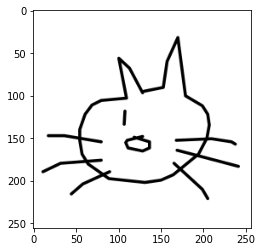

In [18]:
# Convert strokes for single drawing to (256x256) image
test_img = quickdraw.convert_strokes_to_image(drawings[0]['strokes'])
plt.imshow(test_img, cmap='gray')

In [19]:
# Save one image to disk
quickdraw.save_image_to_disk(test_img, '/content/test_image.jpg')

# Generating Versions of dataset
We will generate version of dataset based on two factors
* Number of classes in the dataset
* Number of images to generate per class

Let's first try to generate a version with 10 classes and 100 randomly chosen images per class.

We'll be using the following three functions to generate each version :-
* **load_binary_as_strokes** which will get fpath to a binary file and return us a list of drawings
* **convert_strokes_to_images** which will take a single drawing from the above list and convert it to np.ndarray
* **save_image_to_disk** which will save that np.ndarray to disk in their respective class folder

In [20]:
# Let's first make a directory where we'll save this dataset version
! mkdir /content/quickdraw-10-100

In [22]:
classes_to_generate = random.sample(quickdraw.labels, 10)
# classes_to_generate = [class_name for class_name in classes_to_generate]
classes_to_generate

['picture frame',
 'carrot',
 'ant',
 'lighthouse',
 'sword',
 'rifle',
 'chandelier',
 'cactus',
 'fish',
 'shark']

In [23]:
binary_files_dir = '/content/Skribbl-bot/data/binary'

class_binary_fpaths = list()
for class_name in classes_to_generate:
    class_binary_fpaths.append(os.path.join(binary_files_dir, f'{class_name}.bin'))

class_binary_fpaths

['/content/Skribbl-bot/data/binary/picture frame.bin',
 '/content/Skribbl-bot/data/binary/carrot.bin',
 '/content/Skribbl-bot/data/binary/ant.bin',
 '/content/Skribbl-bot/data/binary/lighthouse.bin',
 '/content/Skribbl-bot/data/binary/sword.bin',
 '/content/Skribbl-bot/data/binary/rifle.bin',
 '/content/Skribbl-bot/data/binary/chandelier.bin',
 '/content/Skribbl-bot/data/binary/cactus.bin',
 '/content/Skribbl-bot/data/binary/fish.bin',
 '/content/Skribbl-bot/data/binary/shark.bin']

In [26]:
version_dataset_dir = '/content/quickdraw-10-100'
for binary_fpath in class_binary_fpaths:

    class_name = os.path.basename(binary_fpath)[:-4]
    if not os.path.exists(os.path.join(version_dataset_dir, class_name)):
        os.makedirs(os.path.join(version_dataset_dir, class_name))

    print(f'Generating drawings for {class_name}')
    drawings = quickdraw.load_binary_as_strokes(binary_fpath)
    print(f'{len(drawings)} images found for {class_name}')

    # randomly sample 100 drawings
    random_drawings = random.sample(drawings, 100)

    for i, drawing in enumerate(random_drawings):
        strokes = drawing['strokes']
        # convert strokes to nparray
        img_arr = quickdraw.convert_strokes_to_image(strokes)

        # save to disk
        save_fpath = os.path.join(version_dataset_dir, class_name, f'{i}.jpg')
        quickdraw.save_image_to_disk(img_arr, save_fpath)

        # break only when testing the loop
        # break
    # break

Generating drawings for picture frame
122371 images found for picture frame
Generating drawings for carrot
132459 images found for carrot
Generating drawings for ant
124612 images found for ant
Generating drawings for lighthouse
160903 images found for lighthouse
Generating drawings for sword
123802 images found for sword
Generating drawings for rifle
172444 images found for rifle
Generating drawings for chandelier
167502 images found for chandelier
Generating drawings for cactus
131676 images found for cactus
Generating drawings for fish
134150 images found for fish
Generating drawings for shark
126050 images found for shark


# Okay, that was faster than expected really...